In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical
import numpy as np

# Load the MNIST dataset
(X_train, Y_train), (X_val, Y_val) = datasets.mnist.load_data()

# Normalize the images to [0, 1]
X_train = X_train.astype('float32') / 255.0
X_val = X_val.astype('float32') / 255.0

# Reshape the data to include the channel dimension
X_train = np.expand_dims(X_train, axis=-1)
X_val = np.expand_dims(X_val, axis=-1)

# One-hot encode the labels
Y_train = to_categorical(Y_train, 10)
Y_val = to_categorical(Y_val, 10)

# Define the CNN model
model = models.Sequential([
    layers.Input(shape=(28, 28, 1)),
    
    layers.Conv2D(32, (3, 3), padding='same'),
    layers.BatchNormalization(),
    layers.ReLU(),
    
    layers.MaxPooling2D((2, 2), strides=2),
    
    layers.Conv2D(64, (3, 3), padding='same'),
    layers.BatchNormalization(),
    layers.ReLU(),
    
    layers.MaxPooling2D((2, 2), strides=2),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, Y_train, epochs=20, batch_size=128,
                    validation_data=(X_val, Y_val), verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_val, Y_val, verbose=0)
print(f'Validation accuracy: {accuracy * 100:.2f}%')


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - accuracy: 0.8788 - loss: 0.4239 - val_accuracy: 0.9719 - val_loss: 0.1219
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.9846 - loss: 0.0501 - val_accuracy: 0.9789 - val_loss: 0.0655
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9888 - loss: 0.0368 - val_accuracy: 0.9836 - val_loss: 0.0494
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.9915 - loss: 0.0250 - val_accuracy: 0.9861 - val_loss: 0.0442
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9927 - loss: 0.0222 - val_accuracy: 0.9878 - val_loss: 0.0383
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9940 - loss: 0.0178 - val_accuracy: 0.9887 - val_loss: 0.0377
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9948 - loss: 0.0146 - val_accuracy: 0.9885 - val_loss: 0.0379
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1

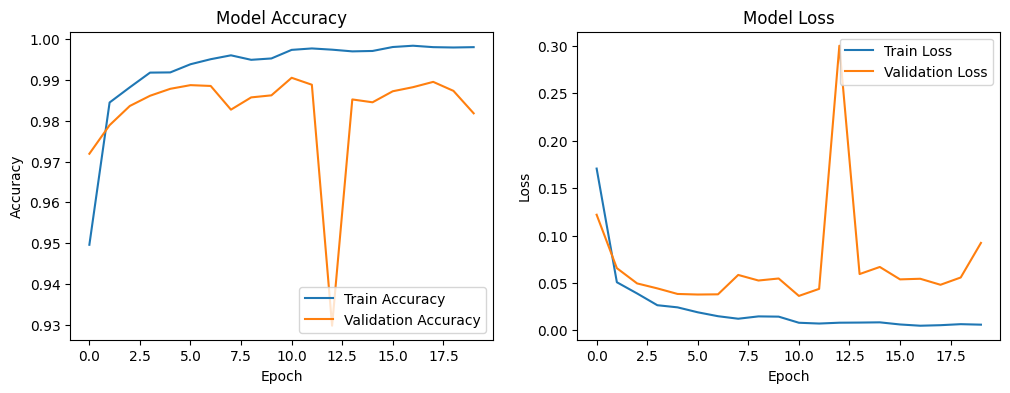

In [7]:

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


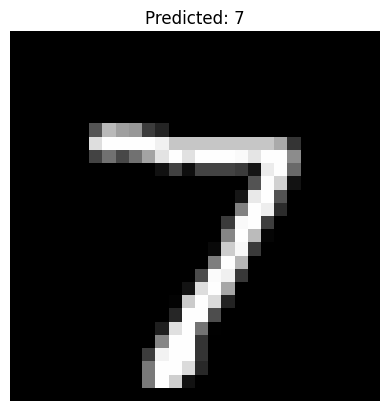

Predicted class: 7
True class: 7


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Function to display an image and its prediction
def display_prediction(image, prediction):
    plt.imshow(image.squeeze(), cmap='gray')
    plt.title(f'Predicted: {np.argmax(prediction)}')
    plt.axis('off')
    plt.show()

# Load a single image for inference (e.g., the first image from the validation set)
test_image = X_val[0]
test_label = Y_val[0]

# Add batch dimension (Keras expects a batch dimension)
test_image_batch = np.expand_dims(test_image, axis=0)

# Perform inference
prediction = model.predict(test_image_batch)

# Display the prediction
display_prediction(test_image, prediction)

# Print the predicted class and the true class
predicted_class = np.argmax(prediction)
true_class = np.argmax(test_label)

print(f'Predicted class: {predicted_class}')
print(f'True class: {true_class}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


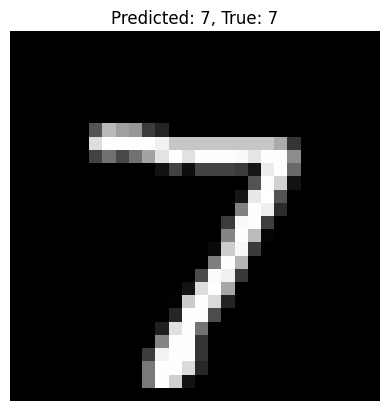

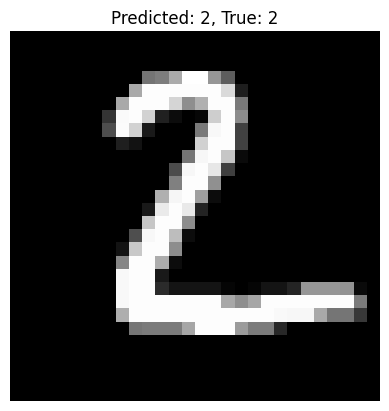

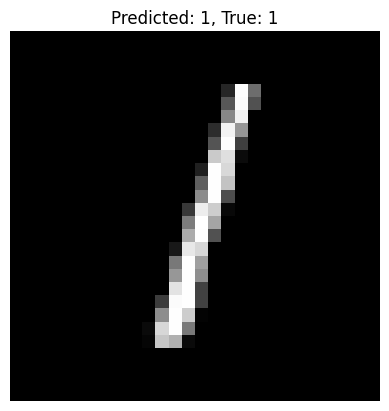

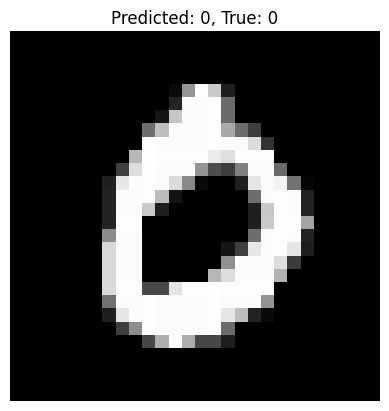

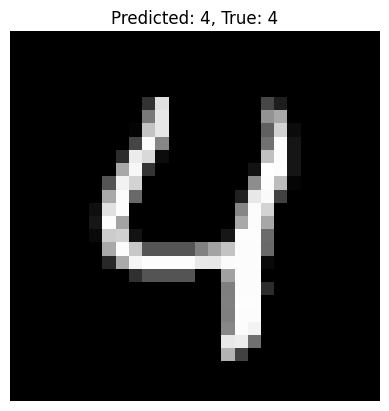

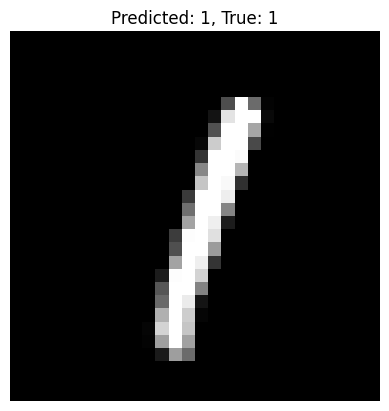

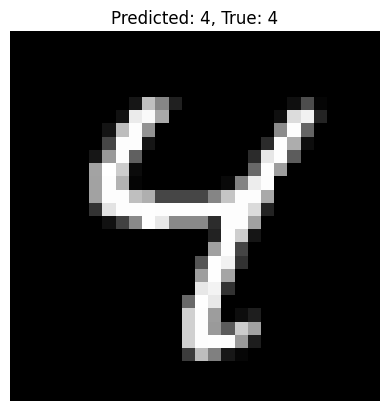

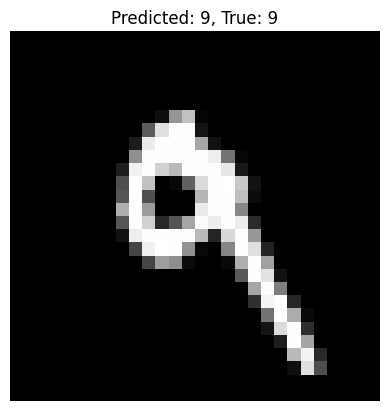

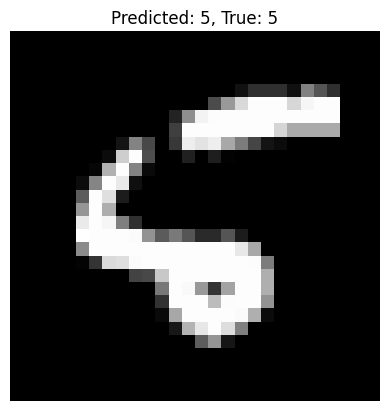

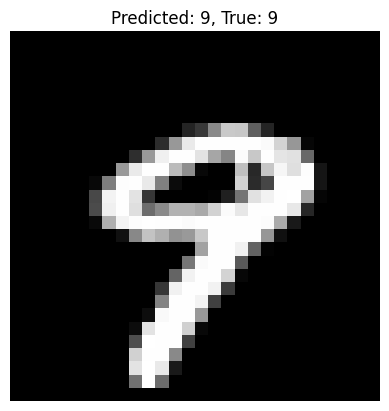

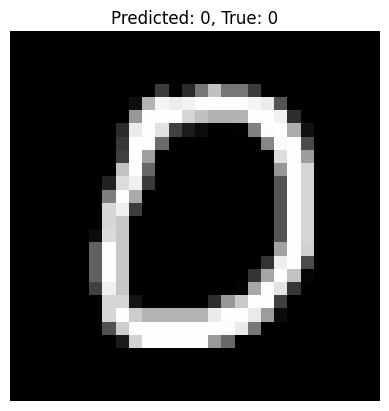

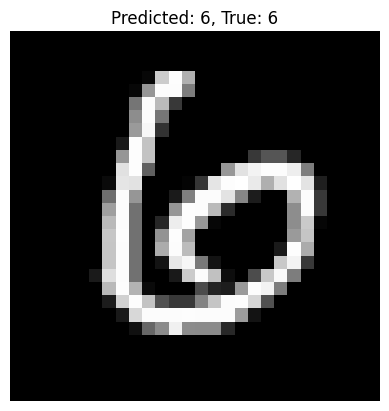

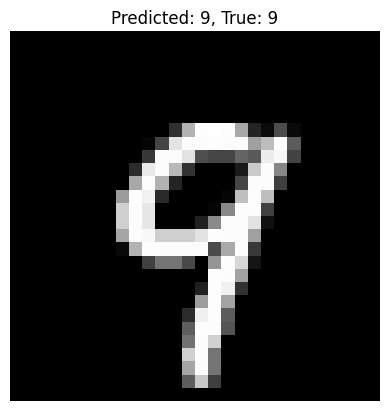

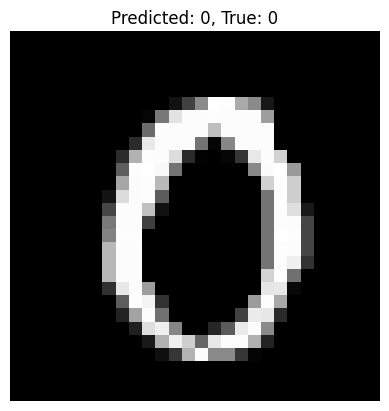

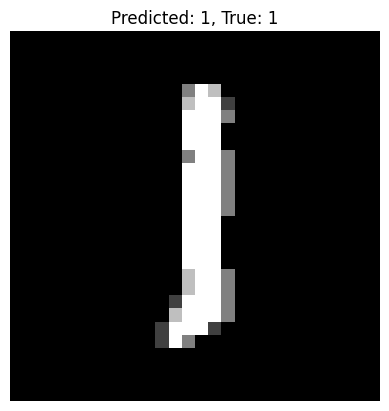

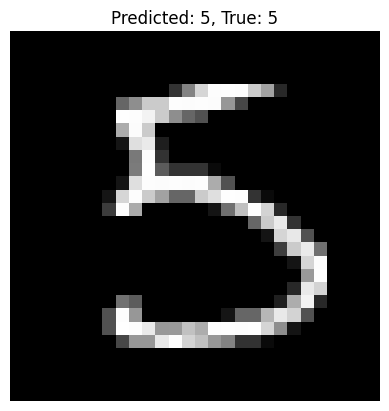

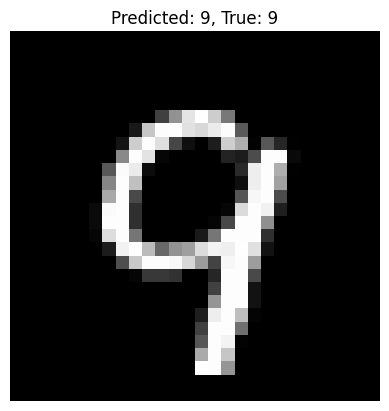

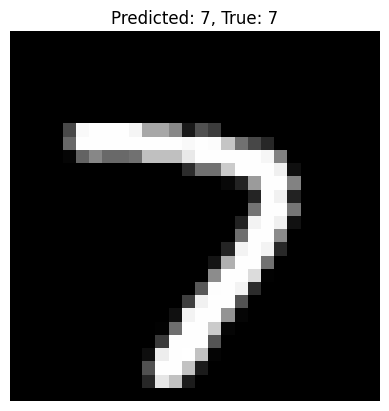

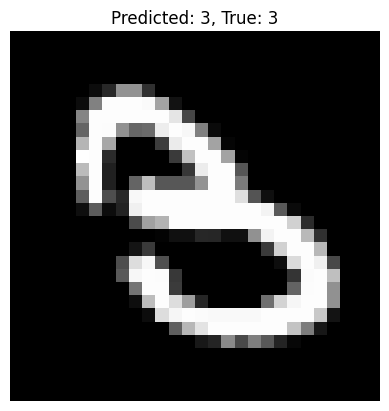

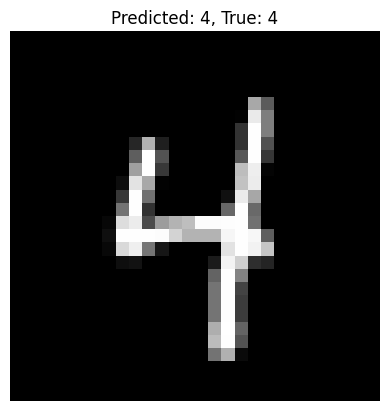

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Function to display an image and its prediction
def display_prediction(image, prediction, true_label):
    plt.imshow(image.squeeze(), cmap='gray')
    plt.title(f'Predicted: {np.argmax(prediction)}, True: {np.argmax(true_label)}')
    plt.axis('off')
    plt.show()

# Select 20 images from the validation set
num_images = 20
test_images = X_val[:num_images]
test_labels = Y_val[:num_images]

# Perform inference on each image
predictions = model.predict(test_images)

# Display predictions for each image
for i in range(num_images):
    display_prediction(test_images[i], predictions[i], test_labels[i])
    
    predicted_class = np.argmax(predictions[i])
    true_class = np.argmax(test_labels[i])
    
   
